In [70]:
import os
import time
import random
import numpy as np
import pandas as pd
import timeit
import openpyxl
import lxml
import requests
import matplotlib.pyplot as plt

# Clear the screen
def cls():
    os.system('cls')

cls()



In [60]:
# Speed difference from the random module and numpy module
%timeit -r10 -n1000 [np.random.randint(0, 100, 100)]
%timeit -r10 -n1000 [random.sample(range(0, 100), 100)]

#Because this is so fast we are running it 10 times and looping it 1000 times

11.2 µs ± 2.1 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)
42.5 µs ± 12.2 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


Pandas Series and Dataframe
Series is like a key value pair
Dataframe is more like a dictionary 

In [61]:
# Series Object
my_numpy_array = np.random.randint(0, 100, 3)
print(my_numpy_array)
print(type(my_numpy_array))

my_series = pd.Series(my_numpy_array)
my_series
print(type(my_series))

my_series2 = pd.Series(my_numpy_array, index=["first","second","third"])
print(my_series2)
print(type(my_series2))

[11 66 56]
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
first     11
second    66
third     56
dtype: int32
<class 'pandas.core.series.Series'>


In [62]:
# DataFrame Object
array_2d = np.random.rand(3, 2)
array_2d[0,1]
df = pd.DataFrame(array_2d)
print(df)
print(type(df))
print(df[0])
print(df.columns)
df.columns = ["Cola","Colb"]
df["Cola"]
df["Colb"]


          0         1
0  0.673036  0.467376
1  0.270254  0.521846
2  0.618740  0.709441
<class 'pandas.core.frame.DataFrame'>
0    0.673036
1    0.270254
2    0.618740
Name: 0, dtype: float64
RangeIndex(start=0, stop=2, step=1)


0    0.467376
1    0.521846
2    0.709441
Name: Colb, dtype: float64

Using Pandas to read different file formats

What are some of the common file formats we use?
Text - CSV, JSON, HTML, etc.
Binary - you have to know what your Binary Format is in order to map it out
Relational DataBases - SQL, NoSql, etc.  


In [63]:
# Importing a CSV into a Datafram Variable with Pandas
my_csv = pd.read_csv("proc2.csv", nrows= 2)
print(my_csv)
print(type(my_csv))

     Id            Name                                        CommandLine  \
0  4816  AggregatorHost                                 AggregatorHost.exe   
1   804            Code  "C:\Users\michael.cruz\AppData\Local\Programs\...   

                                                Path  \
0             C:\Windows\System32\AggregatorHost.exe   
1  C:\Users\michael.cruz\AppData\Local\Programs\M...   

                                 Parent             StartTime  
0  System.Diagnostics.Process (svchost)  5/23/2023 9:55:29 AM  
1     System.Diagnostics.Process (Code)  5/23/2023 9:58:09 AM  
<class 'pandas.core.frame.DataFrame'>


                Name                                        CommandLine  \
Id                                                                        
4816  AggregatorHost                                 AggregatorHost.exe   
804             Code  "C:\Users\michael.cruz\AppData\Local\Programs\...   
3796         conhost            \??\C:\Windows\system32\conhost.exe 0x4   
576            csrss                                                NaN   
3264          ctfmon                                       "ctfmon.exe"   

                                                   Path  \
Id                                                        
4816             C:\Windows\System32\AggregatorHost.exe   
804   C:\Users\michael.cruz\AppData\Local\Programs\M...   
3796                    C:\Windows\system32\conhost.exe   
576                                                 NaN   
3264                     C:\Windows\system32\ctfmon.exe   

                                      Parent             Sta

TypeError: Image data of dtype object cannot be converted to float

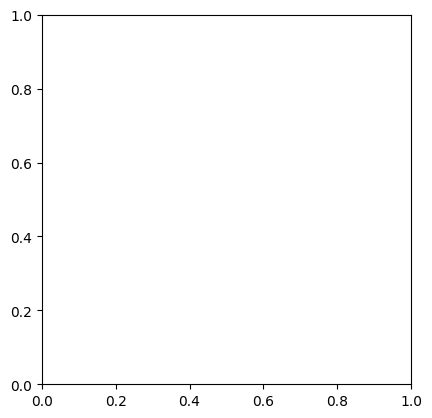

In [71]:
# Here I am adding the index column from an existing unique id column. 
my_csv2 = pd.read_csv(
    "proc2.csv", 
    nrows=5, 
    index_col="Id"
    )
print(my_csv2)
print(type(my_csv2))



In [65]:
# Read a Row .loc [*ID Number] or by the index_col [*"Id"]
my_csv_rowindexcount = pd.read_csv(
    "proc2.csv", 
    index_col="Id",
    )

print(type(my_csv_rowindexcount))
#my_csv_rowindexcount
print(my_csv_rowindexcount.loc[3048]) # Shows a row with all columns
print("-" * 100 ) 
print(my_csv_rowindexcount.loc[3048].at['Path']) # Shows an individual cell using index and a col
print("-" * 100 ) 
print(my_csv_rowindexcount['Name']) 
print("-" * 100 ) 
print(my_csv_rowindexcount.dropna()['Name']) 

<class 'pandas.core.frame.DataFrame'>
Name                                           inetinfo
CommandLine    C:\Windows\system32\inetsrv\inetinfo.exe
Path           C:\Windows\system32\inetsrv\inetinfo.exe
Parent            System.Diagnostics.Process (services)
StartTime                          5/23/2023 9:55:29 AM
Name: 3048, dtype: object
----------------------------------------------------------------------------------------------------
C:\Windows\system32\inetsrv\inetinfo.exe
----------------------------------------------------------------------------------------------------
Id
4816     AggregatorHost
804                Code
3796            conhost
576               csrss
3264             ctfmon
              ...      
15108              w3wp
712             wininit
760            winlogon
2576           WmiPrvSE
13024          WUDFHost
Name: Name, Length: 61, dtype: object
----------------------------------------------------------------------------------------------------
Id
4816

In [66]:
# Read Excel
my_missingupd = pd.read_excel("file:/Temp/missing_updates.xlsx", sheet_name="Raw")
print(my_missingupd.loc[0])

# When can this be useful to you?

DeviceName                     colo-ctx-dwl001.domain.com
OSPlatform                               WindowsServer2012R2
OSVersion                                     6.3.9600.20919
OSArchitecture                                           x64
SoftwareVendor                                     microsoft
SoftwareName                          windows_server_2012_r2
SoftwareVersion                               6.3.9600.20919
CveId                                         CVE-2023-24941
VulnerabilitySeverityLevel                          Critical
RecommendedSecurityUpdate          May 2023 Security Updates
RecommendedSecurityUpdateId                          5026415
Name: 0, dtype: object


In [ ]:
# Read HTML
st = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')[0]
print(type(st))

sttaxrates =pd.read_html('https://taxfoundation.org/2023-sales-taxes/')[0]
print(sttaxrates.columns)
print(sttaxrates.State.count())
print(sttaxrates[sttaxrates['State'] == 'Texas'])
print(sttaxrates.iloc[0])
print(sttaxrates.iloc[-1])

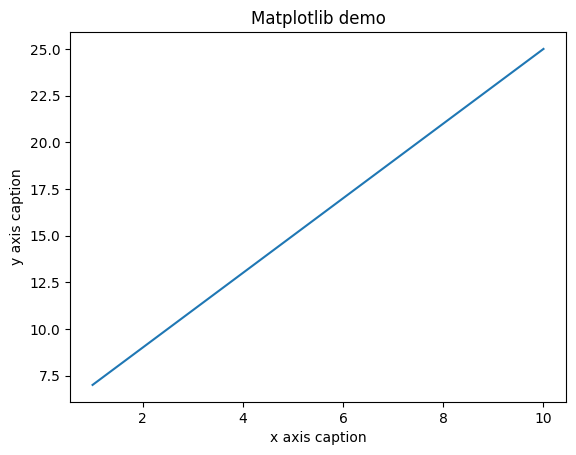

In [72]:
x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()